# Toy OLC and de Bruijn Assembly

## Requirements

To run this code, you will need the software for chapter 15 of *Bioinformatics Algorithms: Design and Implementation in Python* (2018) by Miguel Rocha and Pedro G. Ferreira. This code is **not** licensed under a open-source license, so it is not included here. The version used for this notebook is available [here](https://github.com/miguelfrocha/BioinformaticsAlgorithmsBook/tree/789c5c3056fe1b07476c106259298233d71cd53c/Chapter15).

In addition, you will need [Graphviz](https://www.graphviz.org) as well as its [Python interface](https://github.com/xflr6/graphviz). 

## Imports

Note that simply importing the example code will have an output since it does not use `if __name__ == "__main__"`.

In [1]:
from MyGraph import MyGraph
import assembly_ch15 as olc
import debruijn_ch15 as db
from graphviz import Source as show

['AAT', 'ATC', 'ATG', 'ATG', 'CAA', 'CAT', 'GAT', 'TCA', 'TGA']

ACC  ->  ['CCA']
ATA  ->  ['TAA']
CAT  ->  ['ATA']
CCA  ->  ['CAT']
TAA  ->  []

ATA-1  ->  ['TAA-11']
ACC-2  ->  ['CCA-8']
ATG-3  ->  ['TGG-13']
ATT-4  ->  ['TTC-14', 'TTT-15']
CAT-5  ->  ['ATA-1', 'ATG-3', 'ATT-4']
CAT-6  ->  ['ATA-1', 'ATG-3', 'ATT-4']
CAT-7  ->  ['ATA-1', 'ATG-3', 'ATT-4']
CCA-8  ->  ['CAT-5', 'CAT-6', 'CAT-7']
GCA-9  ->  ['CAT-5', 'CAT-6', 'CAT-7']
GGC-10  ->  ['GCA-9']
TAA-11  ->  []
TCA-12  ->  ['CAT-5', 'CAT-6', 'CAT-7']
TGG-13  ->  ['GGC-10']
TTC-14  ->  ['TCA-12']
TTT-15  ->  ['TTC-14', 'TTT-15']
ACCATGGCATTTCATAA
True
True

ATA-1  ->  ['TAA-11']
ACC-2  ->  ['CCA-8']
ATG-3  ->  ['TGG-13']
ATT-4  ->  ['TTC-14', 'TTT-15']
CAT-5  ->  ['ATA-1', 'ATG-3', 'ATT-4']
CAT-6  ->  ['ATA-1', 'ATG-3', 'ATT-4']
CAT-7  ->  ['ATA-1', 'ATG-3', 'ATT-4']
CCA-8  ->  ['CAT-5', 'CAT-6', 'CAT-7']
GCA-9  ->  ['CAT-5', 'CAT-6', 'CAT-7']
GGC-10  ->  ['GCA-9']
TAA-11  ->  []
TCA-12  ->  ['CAT-5', 'CAT-6', 'CAT-7']
TGG-13  

## Helper functions

These functions are useful for performing the visualization of the assembled graph.

In [2]:
def to_dot(graph: MyGraph) -> str:
    """Converts the internal graph data structure into DOT format."""
    result = "digraph graphname {\nrankdir=LR;\n"
    for v in graph.graph.keys():
        for _v in graph.graph[v]:
            result += (
                "  " + v.replace("-", "") + " -> " + _v.replace("-", "") + "\n"
            )
    result += "}"
    return result

In [3]:
from typing import List

def color_in_dot(dot: str, path: List[str]) -> str:
    """Colorizes a given path along a graph in DOT format."""
    path = [x.replace("-", "") for x in path]
    result = "digraph graphname {\nrankdir=LR;\n"
#     already_colored = []
    edges_in_path = [[path[i], path[i + 1]] for i in range(len(path) - 1)]
    for line in dot.splitlines()[2:-1]:
        result += line
        kmers = [line.lstrip().split(" ")[0], line.split(" ")[-1]]
        if kmers in edges_in_path:
            result += "[style=dashed, color=blue]"
#             already_colored.append(kmers)
        result += "\n"
    result += "}"
    return result

## Parameters

In this case, we are using 3-mers to reconstruct the original sequence.

In [4]:
orig_sequence = "CGATCATCGATGATGATATGA"
frags = olc.composition(3, orig_sequence)
frags

['ATA',
 'ATC',
 'ATC',
 'ATG',
 'ATG',
 'ATG',
 'CAT',
 'CGA',
 'CGA',
 'GAT',
 'GAT',
 'GAT',
 'GAT',
 'TAT',
 'TCA',
 'TCG',
 'TGA',
 'TGA',
 'TGA']

## OLC Assembly

In [5]:
%%time

ovgr = olc.OverlapGraph(frags, True)
path = ovgr.search_hamiltonian_path()
assembled_sequence = ovgr.seq_from_path(path)
print(assembled_sequence, orig_sequence)
if assembled_sequence != orig_sequence:
    print("Assembly failed!")
    

CGATATCATCGATGATGATGA CGATCATCGATGATGATATGA
Assembly failed!
CPU times: user 15.4 s, sys: 107 ms, total: 15.5 s
Wall time: 15.6 s


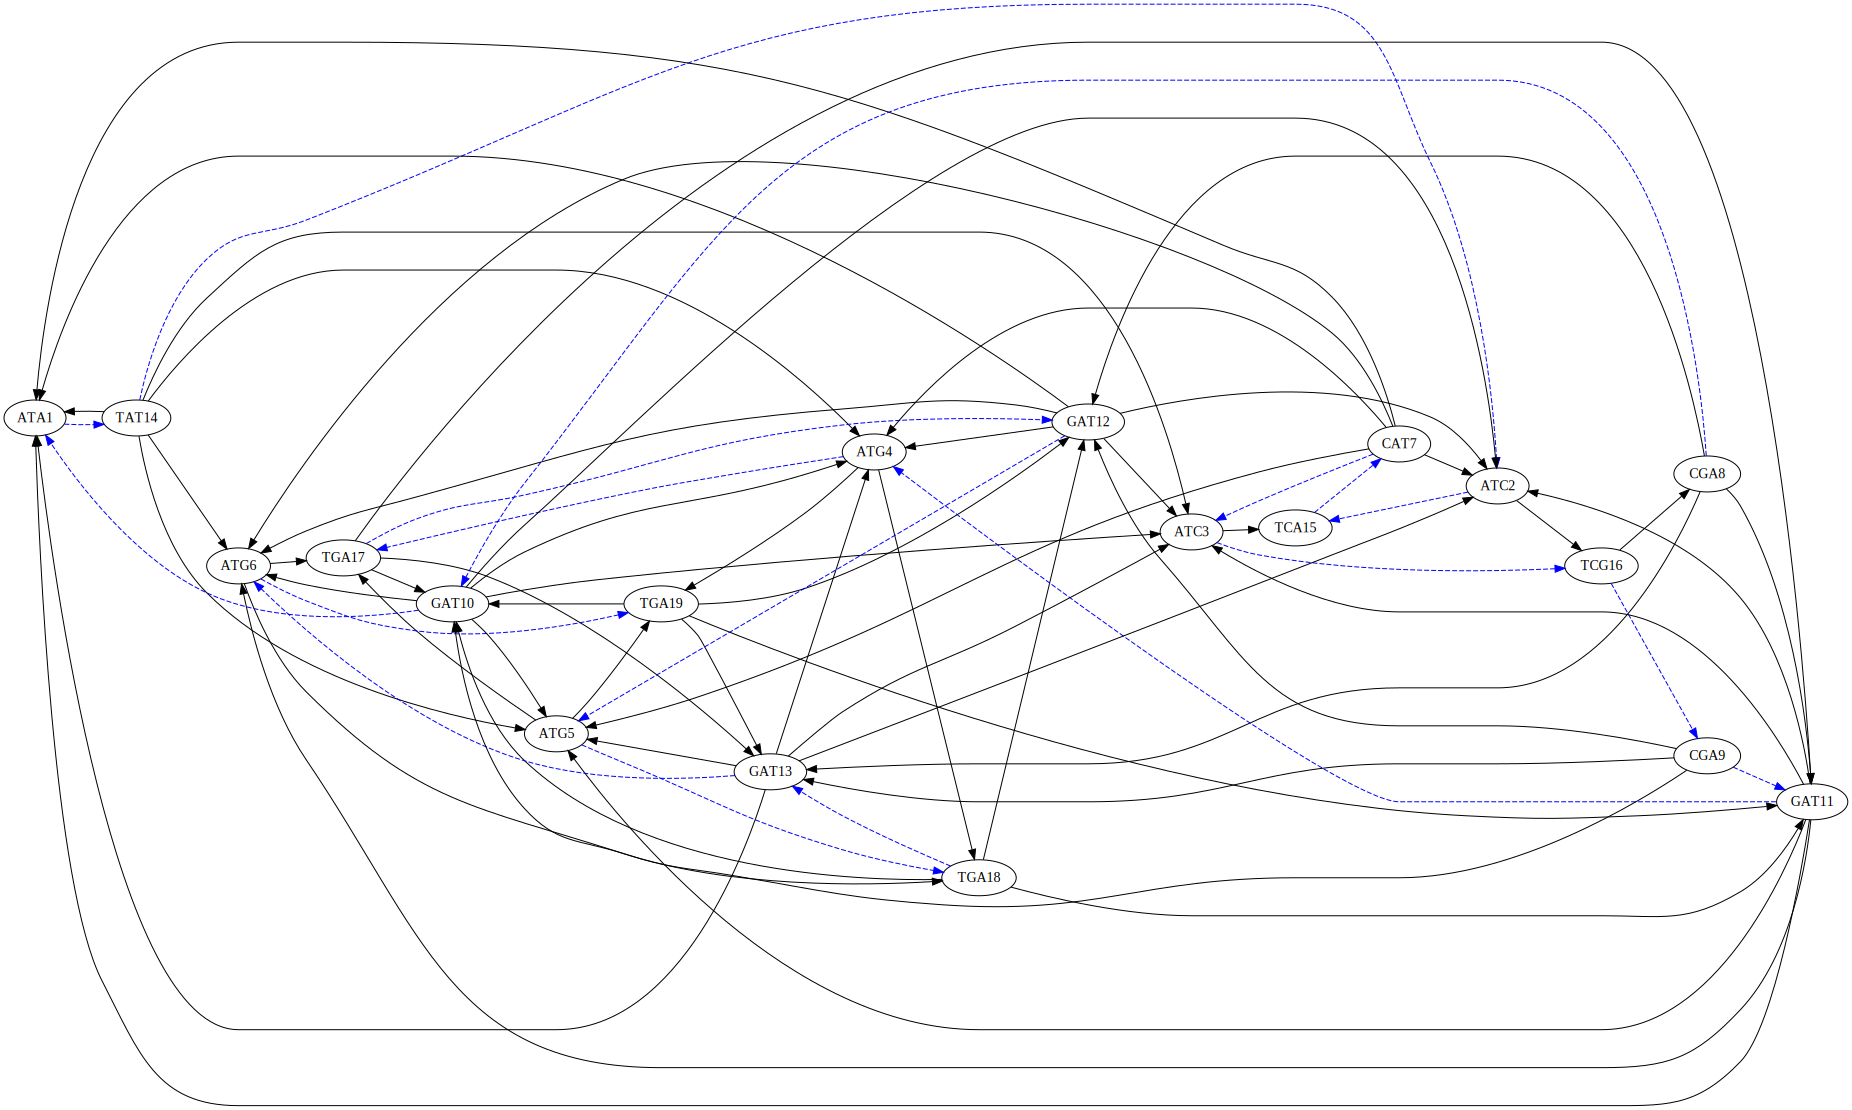

In [6]:
show(color_in_dot(to_dot(ovgr), path))

## de Bruijn Assembly

In [7]:
%%time

dbgr = db.DeBruijnGraph(frags)
path = dbgr.eulerian_path()
assembled_sequence = dbgr.seq_from_path(path)
print(assembled_sequence, orig_sequence)
if assembled_sequence != orig_sequence:
    print("Assembly failed!")

CGATGATGATCGATCATATGA CGATCATCGATGATGATATGA
Assembly failed!
CPU times: user 505 µs, sys: 196 µs, total: 701 µs
Wall time: 762 µs


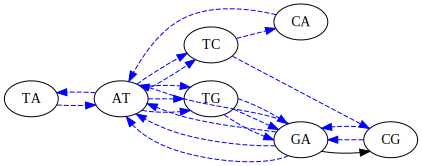

In [8]:
show(color_in_dot(to_dot(dbgr), path))